## HermesPlots


In [25]:
## Packages
import os
import pandas as pd
from pandas import read_excel as read
from pandas import DataFrame as df
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib.patches as mpatches
import numpy as np
%matplotlib inline 

In [2]:
## The data
# dir for readme
os.chdir('../') # move dir back one 
current = os.getcwd() # get current dir
print "Moved Working directory back  %s" % current # check current dir
# Windows or Linux?
path = current+'\\database\\sidis\\' #for Windows
#path = current+'/database/sidis/' # for Linux
os.chdir(path) # change dir
current = os.getcwd() # update current dir

# data read me
with open('README.md') as f:
    for line in f:
        print line

# dir for data
path = current+'\\expdata\\' #for Windows
#path = current+'/expdata/' # for Linux
os.chdir(path) # update current dir

# Grabing list of files
data=os.listdir('./') # list all files in dir
data=[files for files in data if files.endswith('.xlsx') and files.startswith('1')] # list of HERMES data
print "Data files retrieved %s" % data

Moved Working directory back  E:\Laptop\School\Fa_17\Phys296\GIT\PSU-PHYS296\Python
# SIDIS DATABASE



| index | ref          | target   | hadron | obs        | experiment | dependence |

| :--:  | :--:         | :--:     | :--:   | :--:       | :--:       | :--:       |

| 1000  | [link][?]    | proton   | pi+    | M_Hermes   | hermes     | -          |

| 1001  | [link][?]    | proton   | pi-    | M_Hermes   | hermes     | -          |

| 1002  | [link][?]    | proton   | k+     | M_Hermes   | hermes     | -          |

| 1003  | [link][?]    | proton   | k-     | M_Hermes   | hermes     | -          |

| 1004  | [link][?]    | deuteron | pi+    | M_Hermes   | hermes     | -          |

| 1005  | [link][?]    | deuteron | pi-    | M_Hermes   | hermes     | -          |

| 1006  | [link][?]    | deuteron | k+     | M_Hermes   | hermes     | -          |

| 1007  | [link][?]    | deuteron | k-     | M_Hermes   | hermes     | -          |

| 2000  | [link][?]    | proton   | pi+    | A

In [22]:
## Reading and resructuring data for hermes

dat = df(read(data[1]))

# Calculate 
dat["delta"] = np.sqrt(dat["stat_u"]**2.0) # measurment error
dat["qT"] = dat["pT"]/dat["z"]
dat["qT2"] = dat["qT"]**2 #

##Binning data
xBin=[0.023,0.04,0.055,0.075,0.1,0.14,0.2,0.3,0.4,0.6]
Q2Bin=[1.0, 1.25, 1.5, 1.75, 2.0, 2.25, 2.5, 3.0, 5.0, 15.0]
zBin= [0.1, 0.2, 0.3, 0.4, 0.6, 0.8, 1.1]

xClas=range(1,len(xBin))
Q2Clas=range(1,len(Q2Bin))
zClas=range(1,len(zBin))

dat['xClas'] = pd.cut(dat['x'], xBin, labels=xClas)
dat['xBin'] = pd.cut(dat['x'], xBin)

dat['Q2Clas'] = pd.cut(dat['Q2'], Q2Bin, labels=Q2Clas)
dat['Q2Bin'] = pd.cut(dat['Q2'], Q2Bin)

dat['zClas'] = pd.cut(dat['z'], zBin, labels=zClas)
dat['zBin'] = pd.cut(dat['z'], zBin)

## Seting subplot perameters
Zcolor=["red","green","blue","orange",'black','purple','pink']
Zmark=['o', 'v', '^', '<', '>','*','X']
Zline=['--','--','--','--','--','--','--']

shairYax=[[1,1],[2,1],[3,1],[4,1],[5,1],[6,1],[7,1],[8,1],[9,1]] #Subplots with y-axes ticks
shairXax=[[9,1],[9,2],[9,3],[9,4],[9,5],[9,6],[9,7],[9,8],[9,9]] #Subplots with x-axes ticks

In [20]:
# Trouble of many kind, some come from above, some come from behine,

k=0
for n,N in zip(range(len(xBin)),xClas):
    for m,M in zip(range(len(Q2Bin)),Q2Clas):
        data_bin=dat.query('xClas=="%s" and Q2Clas=="%s"' %(N,M))
        print data_bin.head()
        print (k,n,N,m,M)
        k+=1
        
## But I bought a big batt, you'll see, my trouble are gonna have troubles with me. 

   i  Ebeam         x         y         z        Q2        pT       obs  \
0  0   27.6  0.037588  0.641938  0.152031  1.249727  0.109679  M_Hermes   
1  1   27.6  0.037588  0.641938  0.154621  1.249727  0.222693  M_Hermes   
2  2   27.6  0.037588  0.641938  0.156215  1.249727  0.329503  M_Hermes   
3  3   27.6  0.037588  0.641938  0.159591  1.249727  0.442003  M_Hermes   
4  4   27.6  0.037588  0.641938  0.162737  1.249727  0.585996  M_Hermes   

      value    stat_u     ...         col     delta        qT        qT2  \
0  3.786258  0.054781     ...      hermes  0.054781  0.721427   0.520457   
1  7.871387  0.070337     ...      hermes  0.070337  1.440246   2.074308   
2  8.698135  0.067931     ...      hermes  0.067931  2.109299   4.449142   
3  6.991761  0.067629     ...      hermes  0.067629  2.769587   7.670611   
4  4.099734  0.056061     ...      hermes  0.056061  3.600878  12.966326   

  xClas           xBin  Q2Clas        Q2Bin zClas        zBin  
0     1  (0.023, 0.04]      

       i  Ebeam         x        y         z        Q2        pT       obs  \
112  112   27.6  0.095738  0.36718  0.142204  1.820673  0.101722  M_Hermes   
113  113   27.6  0.095738  0.36718  0.143136  1.820673  0.204702  M_Hermes   
114  114   27.6  0.095738  0.36718  0.145270  1.820673  0.305380  M_Hermes   
115  115   27.6  0.095738  0.36718  0.146431  1.820673  0.405641  M_Hermes   
116  116   27.6  0.095738  0.36718  0.146041  1.820673  0.528614  M_Hermes   

        value    stat_u     ...         col     delta        qT        qT2  \
112  3.036977  0.042942     ...      hermes  0.042942  0.715323   0.511687   
113  6.250340  0.074166     ...      hermes  0.074166  1.430122   2.045249   
114  6.525486  0.074045     ...      hermes  0.074045  2.102145   4.419012   
115  5.039637  0.068953     ...      hermes  0.068953  2.770187   7.673938   
116  3.010518  0.057157     ...      hermes  0.057157  3.619618  13.101637   

    xClas          xBin  Q2Clas        Q2Bin zClas        zBin

Empty DataFrame
Columns: [i, Ebeam, x, y, z, Q2, pT, obs, value, stat_u, systole, systabs_u, target, hadron, col, delta, qT, qT2, xClas, xBin, Q2Clas, Q2Bin, zClas, zBin]
Index: []

[0 rows x 24 columns]
(65, 7, 8, 2, 3)
Empty DataFrame
Columns: [i, Ebeam, x, y, z, Q2, pT, obs, value, stat_u, systole, systabs_u, target, hadron, col, delta, qT, qT2, xClas, xBin, Q2Clas, Q2Bin, zClas, zBin]
Index: []

[0 rows x 24 columns]
(66, 7, 8, 3, 4)
Empty DataFrame
Columns: [i, Ebeam, x, y, z, Q2, pT, obs, value, stat_u, systole, systabs_u, target, hadron, col, delta, qT, qT2, xClas, xBin, Q2Clas, Q2Bin, zClas, zBin]
Index: []

[0 rows x 24 columns]
(67, 7, 8, 4, 5)
Empty DataFrame
Columns: [i, Ebeam, x, y, z, Q2, pT, obs, value, stat_u, systole, systabs_u, target, hadron, col, delta, qT, qT2, xClas, xBin, Q2Clas, Q2Bin, zClas, zBin]
Index: []

[0 rows x 24 columns]
(68, 7, 8, 5, 6)
Empty DataFrame
Columns: [i, Ebeam, x, y, z, Q2, pT, obs, value, stat_u, systole, systabs_u, target, hadron, col, de

In [15]:
print dat.xClas.unique()

[1, 3, 4, 6, 7, 9]
Categories (6, int64): [1 < 3 < 4 < 6 < 7 < 9]


In [ ]:
# The plan for the figure according to todays meeting 
#fig = figure
#for n bin in x
    # for m bin in Q2
        #data_bin=dat.query('xBin=="%s" and Q2Bin=="%s"' %(n,m))
        #ax=fig.subplot(n,m)
            #for each zbin
                #ax.plot(data_bin.qT2[data_bin.z==i],data_bin.value[data_bin.z==i],data_bin.delta[data_bin.z==i])

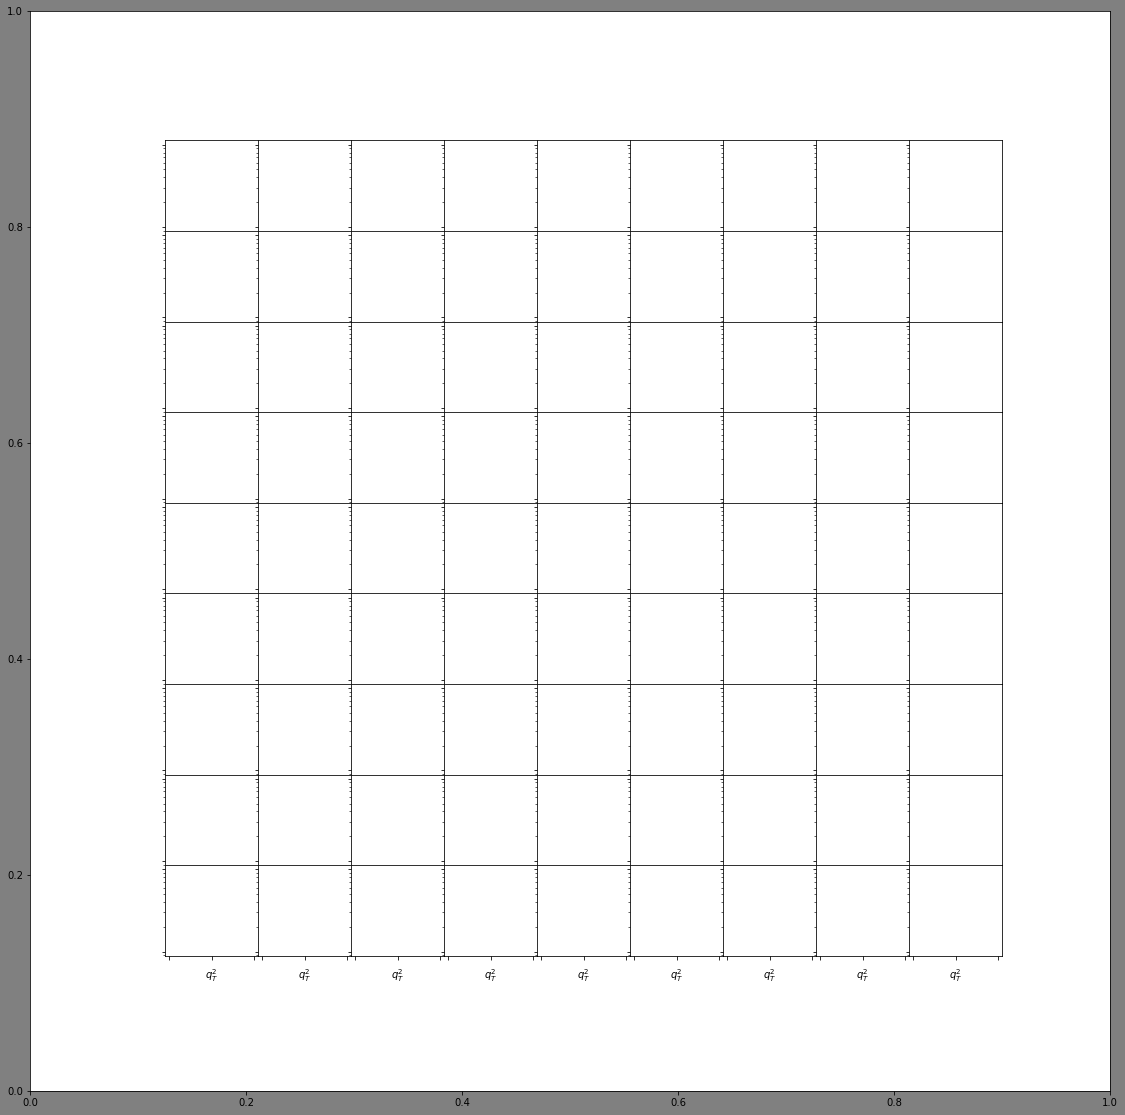

In [26]:
fig=plt.figure(figsize=(15, 15),facecolor="gray") # figsize=wxh in inches
subMat = gridspec.GridSpec(ncols=9, nrows=9, wspace=0.0, hspace=0.0)

ax1=fig.add_axes([0,0,1,1])
#ax.yaxis.set_ticks([ 0.,0.1245,0.2755,0.427,0.57752,0.729,0.8805])
#ax.xaxis.set_ticks([0,0.1285,0.2255,0.322,0.419,0.516,0.613,0.709,0.71+0.097,0.9])
#ax.set_yticklabels([0]+Q2Bin)
#ax.set_xticklabels([0]+xBin)

# Set title and axis labels
#ax.title("COMPASS Data")
#ax.set_ylabel(r"$Q^2$ bins",rotation="horizontal")
#ax.set_xlabel(r"$x$ bins")

# Set legend
#Zpatch1 = mpatches.Patch(color=Zcolor[0], label='z=0.2')
#Zpatch2 = mpatches.Patch(color=Zcolor[1], label='z=0.3')
#Zpatch3 = mpatches.Patch(color=Zcolor[2], label='z=0.4')
#Zpatch4 = mpatches.Patch(color=Zcolor[3], label='z=0.6')
#ax.legend(handles=[Zpatch1,Zpatch2,Zpatch3,Zpatch4],loc='upper left')
#ax.grid()

for n,N in zip(range(len(xBin)),xClas):
    for m,M in zip(range(len(Q2Bin)),Q2Clas):
        data_bin=dat.query('xClas=="%s" and Q2Clas=="%s"' %(N,M))
        k=0 #counter
        for i in zBin:
            ax = fig.add_subplot(subMat[int(n),int(m)])
            ax.set_yscale("log")
            ax.errorbar(data_bin.qT2[data_bin.zBin==i],data_bin.value[data_bin.zBin==i],#x,y
                        data_bin.delta[data_bin.zBin==i],#errorbars
                        color=Zcolor[k],marker=Zmark[k],linestyle=Zline[k],linewidth=0,markersize=2)#line properties
            if [int(n),int(m)] != shairYax:
                ax.set_yticklabels('')
            if [int(n),int(m)] != shairXax:
                ax.set_xticklabels('')
            k+=1 #add one to counter
            ax.set_xlabel(r"$q_T^2$")


In [4]:
## Ploting
fig=plt.figure(figsize=(15, 15),facecolor="gray") # figsize=wxh in inches

globalGrid=gridspec.GridSpec(1, 1, wspace=0.0, hspace=0.0) #the axis to put subplot grid in
innerGrid=gridspec.GridSpecFromSubplotSpec(9, 9, subplot_spec=globalGrid[0], wspace=0.0, hspace=0.0) #subplot grid

# Set custom ticks
ax=fig.add_axes([0,0,1,1])
#ax.yaxis.set_ticks([ 0.,0.1245,0.2755,0.427,0.57752,0.729,0.8805])
#ax.xaxis.set_ticks([0,0.1285,0.2255,0.322,0.419,0.516,0.613,0.709,0.71+0.097,0.9])
#ax.set_yticklabels([0]+Q2Bin)
#ax.set_xticklabels([0]+xBin)

# Set title and axis labels
#ax.title("COMPASS Data")
#ax.set_ylabel(r"$Q^2$ bins",rotation="horizontal")
#ax.set_xlabel(r"$x$ bins")

# Set legend
#Zpatch1 = mpatches.Patch(color=Zcolor[0], label='z=0.2')
#Zpatch2 = mpatches.Patch(color=Zcolor[1], label='z=0.3')
#Zpatch3 = mpatches.Patch(color=Zcolor[2], label='z=0.4')
#Zpatch4 = mpatches.Patch(color=Zcolor[3], label='z=0.6')
#ax.legend(handles=[Zpatch1,Zpatch2,Zpatch3,Zpatch4],loc='upper left')
#ax.grid()

for n in xBin:
    for m in Q2bin:
        data_bin=dat.query('xClas=="%s" and Q2Clas=="%s"' %(n,m))
                           k=0 #counter
                           for i in z:
                                ax = fig.add_subplot(innerGrid[grid])
                                ax.set_yscale("log")
                                ax.errorbar(data_bin.qT2[data_bin.z==i],data_bin.value[data_bin.z==i],#x,y
                                            data_bin.delta[data_bin.z==i],#errorbars
                                            color=Zcolor[k],marker=Zmark[k],linestyle=Zline[k],linewidth=0,markersize=2)#line properties
                                if grid not in shairYax:
                                    ax.set_yticklabels('')
                                if grid not in shairXax:
                                    ax.set_xticklabels('')
                                k+=1 #add one to counter
                                ax.set_xlabel(r"$q_T^2$")


   i  Ebeam         x         y         z        Q2        pT       obs  \
0  0   27.6  0.037588  0.641938  0.152031  1.249727  0.109679  M_Hermes   
1  1   27.6  0.037588  0.641938  0.154621  1.249727  0.222693  M_Hermes   
2  2   27.6  0.037588  0.641938  0.156215  1.249727  0.329503  M_Hermes   

      value    stat_u  systole  systabs_u  target hadron     col  
0  3.786258  0.054781        0   0.964395  proton    pi-  hermes  
1  7.871387  0.070337        0   0.785313  proton    pi-  hermes  
2  8.698135  0.067931        0   0.220046  proton    pi-  hermes  
